#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.


### You would need to submit your GitHub repository link. Refer to the Section 6: Final Submission on the PDF document for the details.


In [4]:
import cv2
import numpy as np  # You'll likely need this as np
import matplotlib.pyplot as plt  # You'll likely need this as plt
from sklearn.cluster import KMeans  # This is the correct import syntax
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
import cv2
# Reading the image plaksha_Faculty.jpg
img = cv2.imread('/Users/dhruvpande/Documents/MLPR/distance_classification/Plaksha_Faculty.jpg')
  
if img is None:
    print("Error: Could not read image file")
else:
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Load the Haar cascade using the path from OpenCV's data directory
    # This is more reliable than assuming the XML file is in the current directory
    haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
    face_cascade = cv2.CascadeClassifier(haar_cascade_path)
    
    # Check if cascade loaded properly
    if face_cascade.empty():
        print("Error: Could not load face cascade classifier XML file")
    else:
        # Applying the face detection method on the grayscale image
        faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
        
        # Define the text and font parameters
        text = f"Face #{len(faces_rect)}"  # The text you want to write
        font = cv2.FONT_HERSHEY_SIMPLEX  # Font type
        font_scale = 0.5  # Font scale factor
        font_color = (0, 0, 255)  # Text color in BGR format (red)
        font_thickness = 2  # Thickness of the text
        
        # Draw rectangles and text for detected faces
        for (x, y, w, h) in faces_rect:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, text, (x, y-10), font, font_scale, font_color, font_thickness)
        
        # Display the image
        cv2.imshow(f"Total number of face detected are {len(faces_rect)}", img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


2025-02-26 21:57:02.828 Python[97343:1873406] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-26 21:57:02.829 Python[97343:1873406] +[IMKInputSession subclass]: chose IMKInputSession_Modern


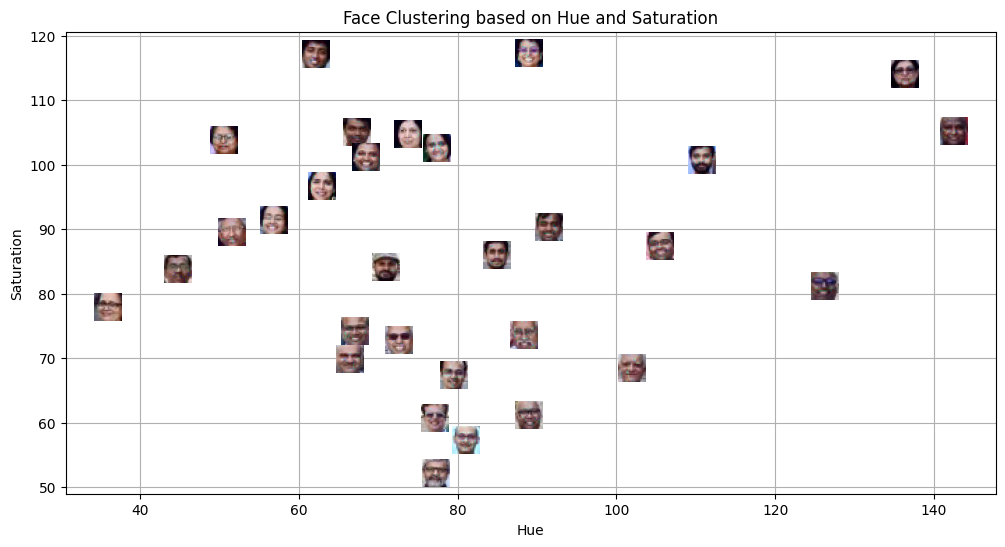

In [3]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img = cv2.imread('/Users/dhruvpande/Documents/MLPR/distance_classification/Plaksha_Faculty.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images
haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_cascade_path)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

# Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Face Clustering based on Hue and Saturation')
## Put grid
plt.grid(True)
## show the plot
plt.show()

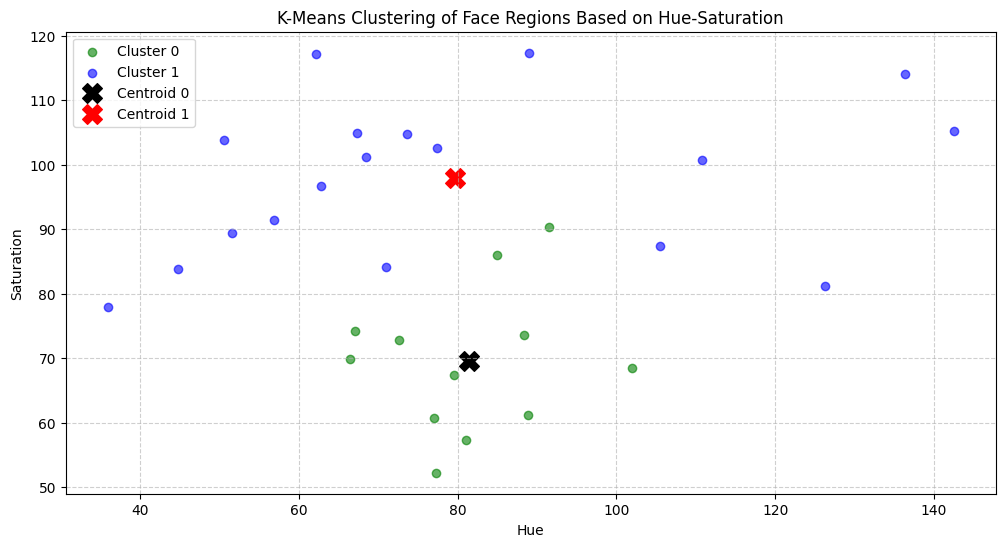

In [4]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0', alpha=0.6)


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1', alpha=0.6)

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1], c='black', marker='X', s=200, label='Centroid 0')
plt.scatter(centroid_1[0], centroid_1[1], c='red', marker='X', s=200, label='Centroid 1')

# Put x label
plt.xlabel("Hue")
# Put y label
plt.ylabel("Saturation")
# Put title
plt.title("K-Means Clustering of Face Regions Based on Hue-Saturation")
# Add a legend
plt.legend()
# Add grid
plt.grid(True, linestyle='--', alpha=0.6)
# Show the plot
plt.show()


In [ ]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('/Users/dhruvpande/Documents/MLPR/distance_classification/Dr_Shashi_Tharoor.jpg')
gray_template_img = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)

# Load the pre-trained Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(gray_template_img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow('Detected Face - Dr. Shashi Tharoor', template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

2025-02-26 22:08:34.547 Python[97468:1875160] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-26 22:08:34.547 Python[97468:1875160] +[IMKInputSession subclass]: chose IMKInputSession_Modern


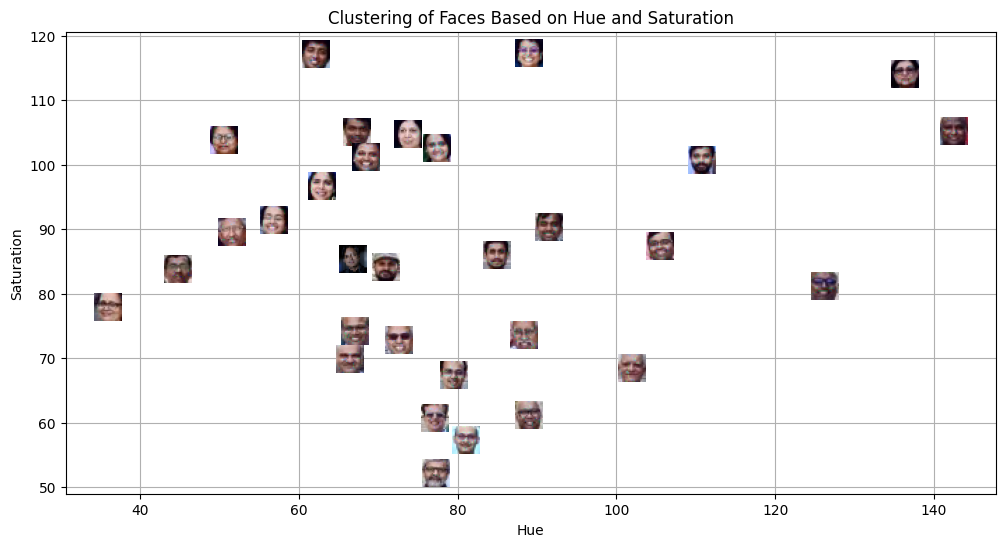

In [13]:
# Convert the template image to HSV color space and store it in template_hsv
template_img = cv2.imread('/Users/dhruvpande/Documents/MLPR/distance_classification/Dr_Shashi_Tharoor.jpg')
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
hue_saturation = []
face_images = [] 
haar_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_cascade_path)
img = cv2.imread('/Users/dhruvpande/Documents/MLPR/distance_classification/Plaksha_Faculty.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)
kmeans = KMeans(n_clusters=3, random_state=0).fit(hue_saturation)
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("Clustering of Faces Based on Hue and Saturation")
plt.grid(True)
plt.show()

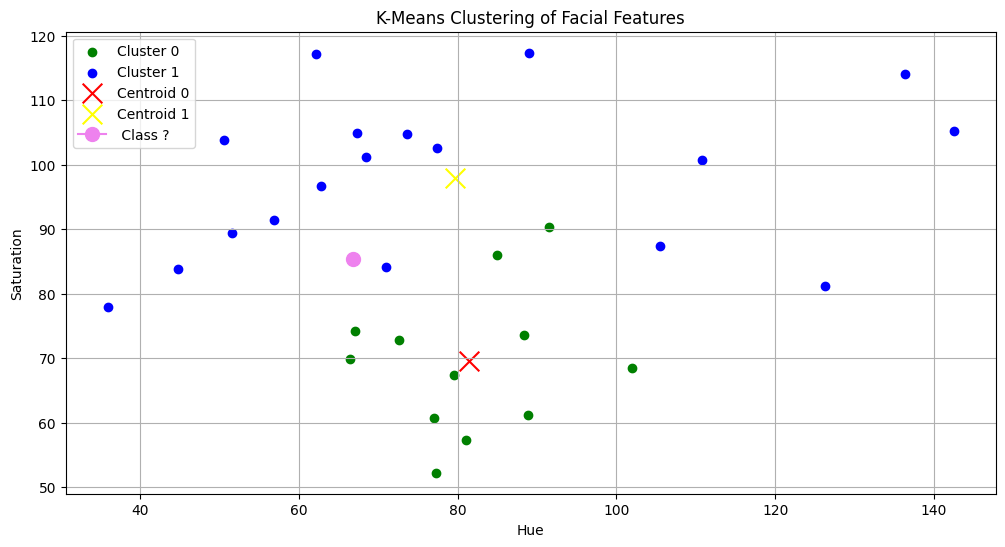

In [15]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0], cluster_0_points[:, 1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0], cluster_1_points[:, 1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], c='red', marker='x', s=200, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='yellow', marker='x', s=200, label='Centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.title('K-Means Clustering of Facial Features')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

Euclidean Distance
Manhattan Distance
Minkowski Distance
Cosine Similarity
Hamming Distance

#### 2. What are some real-world applications of distance-based classification algorithms? 
Face Recognition
Handwriting Recognition (OCR)

#### 3. Explain various distance metrics. 
Euclidean Distance: Straight-line distance between points.
Manhattan Distance: Sum of absolute differences in coordinates.
Minkowski Distance: Generalization of Euclidean and Manhattan.
Cosine Similarity: Measures angle between two vectors.
Hamming Distance: Used for categorical data, counts differing bits/characters.

#### 4. What is the role of cross validation in model performance? 
Prevents overfitting.
Helps in model selection.
Improves generalization.

#### 5. Explain variance and bias in terms of KNN? 
Low K (e.g., K=1): High variance, low bias (model overfits, sensitive to noise).
High K: Low variance, high bias (model underfits, loses details).
Optimal K balances bias and variance for better generalization.